# Исследование данных о российском кинопрокате



**Описание проекта**

Заказчик этого исследования — Министерство культуры Российской Федерации.<br>Нужно изучить:
* рынок российского кинопроката и выявить текущие тренды;
* фильмы, которые получили государственную поддержку, ответить на вопрос, насколько такие фильмы интересны зрителю.

Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**План Исследования:**
* произведем считывание файлов с данными и их объединение в один датафрейм;
* произведем предобработку данных;
* проведем исследовательский анализ данных;
* исследуем фильмы, которые получили государственную поддержку;
* сделаем общий вывод

### Откроем файлы с данными и объединим их в один датафрейм. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Прочтем файлы с данными и сохраним их в переменных `data` и `data_show`, ознакомимся с ними.

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)
data = pd.read_csv('/datasets/mkrf_movies.csv')
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [5]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [6]:
data_shows.head()

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


Для дальнейшей работы с данными нам необходимо объеденить их в один датафрейм, например по столбцу 'puNumber', только нам необходимо привести их к одному типу. Очевидно, что мы можем приветси к такому же типу данныx как и в **'data_shows'** (Int64) данные в **'data'**.

In [7]:
#data['puNumber'] = data['puNumber'].astype('int')

Судя по ошибке, в данных столбца 'puNumber' пристутсвует строки **'нет'**, ее мы не можем привести к типу **Int**. Посмотрим на эти строки.

In [8]:
data[data['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Как мы видим это 1 строка, в которой пропущено очень много значений в 7 столбцах из 15. Удалим ее, приведем к одному типу данных данные и повторим объединение. Проверим наши объединенные данные в **'data'**.

In [9]:
data = data.drop(data[data['puNumber'] == 'нет'].index)

In [10]:
data['puNumber'] = data['puNumber'].astype('int')

In [11]:
data = data.merge(data_shows, on='puNumber', how='left')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [13]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Объединение прошло успешно, мы видим что у нас добавился новый столбец **'box_office'**. 

Переименуем столбец **'puNumber'** на **'pu_number'**

In [14]:
data = data.rename(columns={'puNumber': 'pu_number'})

**Промежуточный вывод**

Мы считали файлы с данными о российском кинопрокате с 2х источников.
* В 1м источнике данных имеются 7486 записи.
* Во 2м источнике 3158 записи, это 2 столбца:
    * номер прокатного удостоверения (который имеется также в первом источнике)
    * сборы от проката фильма в кинотеатрах в рублях.
* Мы объеденили таблицы с разных источников по общим данным - номер прокатного удостоверения
* Дополнительно мы переименовали столбец 'puNumber' на 'pu_number' согласно принятому стилю
* В данных имеются такие проблемы как:
    * пропуски в нескольких колонках
    * формат типа данных не везде соответствует типу данных
Необходимо сделать предобработку данных, для возможности их дальнейшего анализа.

### Предобработка данных

#### Проверим типы данных

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   pu_number              7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Изменим тип данных в столбцах:
* **'show_start_date'** с 'object' на 'datetime'
* **'ratings'** с 'object' на 'float'
* **'refundable_support', 'nonrefundable_support', 'budget'** с 'float' на 'int'

Предварительно проверим уникальные значения в столбце **'ratings'**

In [16]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

как видно из представленных значений здесь 2 проблемы:
* наличие символа **`%`** в рейтинге;
* разная шкала рейтинга `10` бальная шкала и `100%` шкала
Приведем все к одному типу

In [17]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

data['ratings'] = (
    data['ratings'].str.rstrip('%')
    .astype('float').apply(lambda x: x/10 if x > 10 else x)
)

data[['refundable_support', 'nonrefundable_support', 'budget']] = (
    data[['refundable_support', 'nonrefundable_support', 'budget']]
    .apply(pd.to_numeric, errors='coerce').astype('Int64')
)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   pu_number              7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    Int64         
 10  nonrefundable_support  332 non-null    Int64         
 11  budget                 332 non-null    Int64         
 12  financing_source       332 non-null    object        
 13  rat

In [19]:
data['ratings'].sort_values().unique()

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.4, 9.7, 9.8, 9.9, nan])

#### Изучим пропуски в датафрейме

Перед обработкой пропусков зафиксируем размер датасета.

In [20]:
temp = data.copy()
len(temp)

7485

Посмотрим на пропуски в данных

In [21]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

In [22]:
missing = (pd.DataFrame({'Кол-во пропусков': temp.isnull().sum(), 'Доля пропусков': temp.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
title,0,0.000000
pu_number,0,0.000000
show_start_date,0,0.000000
type,0,0.000000
film_studio,18,0.002400
production_country,2,0.000300
director,9,0.001200
producer,568,0.075900
age_restriction,0,0.000000
refundable_support,7153,0.955600


Посмотрим на пропуски в столбцах **'film_studio'**, **'production_country'** и **'director'**

In [23]:
data[data['film_studio'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.30,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,4.00,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10 12:00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011918,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
6398,Доживем до каникул?..,111021918,2018-11-15 12:00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,41225.00
6484,До и После,112014418,2018-12-05 12:00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,6.90,"драма,криминал,детектив",NaN
6493,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
6496,Мой папа Чингисхан,112014918,2018-12-06 12:00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN


In [24]:
data[data['production_country'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,7.20,"детский,комедия",194527.00
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,4.00,"мультфильм,комедия",NaN


In [25]:
data[data['director'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,NaN,NaN,44350.00
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,7.90,"концерт,музыка",NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,4.00,"мультфильм,комедия",NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,6.70,"концерт,музыка",NaN


Данные в столбцах **'film_studio'**, **'director'** нам заполнить нечем, слишком мало данных, заполним значением **'unknown'**. А вот в столбце **'production_country'** для **'Ералаш'** мы можем заполнить страну как Россия.

In [26]:
data.loc[data['pu_number'] == 111001216, 'production_country'] = 'Россия'

По данным в столбце **'producer'**, и оставшийся пропуск в столбце **'production_country'** аналогично нам заполнить нечем, также заполним **'unknown'**.

In [27]:
columns_to_fill = [ 'film_studio', 'director', 'producer', 'production_country']
data[columns_to_fill] = data[columns_to_fill].fillna('unknown')

Расмотрим пропуски в столбцах **'refundable_support'**, **'nonrefundable_support'**, **'budget'** и **'financing_source'**

Судя по описанию <b>"...столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. "</b>.

Соответственно, данные во всех четырех столбцах связаны, что также потверждает общее количество пропущенных значений. Отсюда следует, что раз пропущено значение в столбце **'budget'**, значит государственная поддержка для данного фильма равна **'0'**, как и в остальных столбцах, кроме **'financing_source'**.
В столбце **'financing_source'** мы пропуски заполним словом 'нет'.

In [28]:
columns_to_fill = ['refundable_support', 'nonrefundable_support', 'budget']
data[columns_to_fill] = data[columns_to_fill].fillna(0)

In [29]:
data['financing_source'] = data['financing_source'].fillna('нет')

По столбцам **'ratings', 'genres'** у нас нет данных, посмоторим на распределение рейтингов по имеющимся данным. А пропуски в столбце **'genres'** заполним на значение **'unknown'**.

In [30]:
data['genres'] = data['genres'].fillna('unknown')

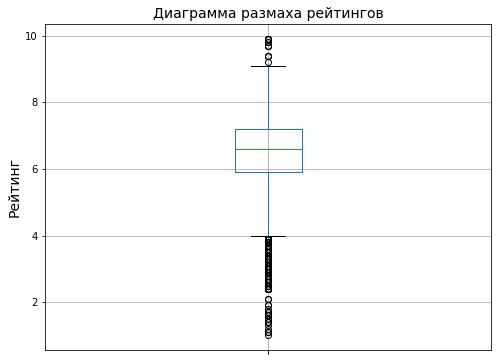

count   6519.00
mean       6.49
std        1.11
min        1.00
25%        5.90
50%        6.60
75%        7.20
max        9.90
Name: ratings, dtype: float64

In [31]:
data['ratings'].plot(grid=True, kind='box', figsize=(8, 6))
plt.title('Диаграмма размаха рейтингов', size=14)
plt.boxplot(data['ratings'], labels=[''])
plt.ylabel('Рейтинг', size=14)
plt.xticks(fontsize=14)
plt.show()
data['ratings'].describe()

Медианное значение рейтингов 6,6. Посмотрим на распределение рейтингов в зависимости от группировки по столбцам **'age_restriction', 'type', 'genres'**

In [32]:
data.groupby('age_restriction')['ratings'].describe()

,count,mean,std,min,25%,50%,75%,max
age_restriction,,,,,,,,
«0+» - для любой зрительской аудитории,468.00,6.55,1.46,1.20,5.80,6.90,7.60,9.90
«12+» - для детей старше 12 лет,1348.00,6.67,1.07,1.60,6.10,6.80,7.40,9.90
«16+» - для детей старше 16 лет,2663.00,6.47,1.04,1.10,5.90,6.60,7.20,9.90
«18+» - запрещено для детей,1512.00,6.30,1.10,1.50,5.60,6.40,7.10,9.40
«6+» - для детей старше 6 лет,528.00,6.56,1.20,1.00,5.88,6.70,7.40,9.90


Здесь у нас особо не изменяется медианное значение по группам аудиторий, медианое значение находится в пределах `6,4-6,9`.

In [33]:
data.groupby('type')['ratings'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Анимационный,1.00,6.40,NaN,6.40,6.40,6.40,6.40,6.40
Художественный,1234.00,6.36,1.02,1.60,5.70,6.40,7.00,9.80
Анимационный,570.00,6.33,1.38,1.30,5.60,6.50,7.40,9.70
Документальный,162.00,7.00,1.00,3.20,6.40,7.10,7.70,9.90
Музыкально-развлекательный,1.00,6.90,NaN,6.90,6.90,6.90,6.90,6.90
Научно-популярный,35.00,7.05,1.10,3.70,6.85,7.30,7.70,8.50
Прочие,210.00,7.10,1.01,1.60,6.62,7.20,7.80,8.80
Художественный,4306.00,6.49,1.09,1.00,5.90,6.60,7.20,9.90


Есть небольшие изменения медианного значения в зависимости от типа фильма.

In [34]:
data.groupby('genres')['ratings'].describe()

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
unknown,9.00,6.46,1.74,4.30,5.20,5.50,8.30,8.80
"аниме,мультфильм",2.00,6.95,0.07,6.90,6.93,6.95,6.97,7.00
"аниме,мультфильм,боевик",11.00,6.90,0.81,5.80,6.35,6.90,7.20,8.10
"аниме,мультфильм,детектив",2.00,7.95,0.07,7.90,7.93,7.95,7.97,8.00
"аниме,мультфильм,драма",7.00,7.74,0.27,7.40,7.50,7.90,7.95,8.00
...,...,...,...,...,...,...,...,...
"фэнтези,триллер,драма",12.00,6.59,0.85,4.90,6.05,6.85,7.10,8.00
"фэнтези,триллер,мелодрама",4.00,5.97,0.05,5.90,5.97,6.00,6.00,6.00
"фэнтези,триллер,приключения",4.00,5.85,0.44,5.30,5.60,5.95,6.20,6.20


Оставим пропуски в данном столбце, так как корректной замены у нас не получиться, ввиду того что существуют различные версии фильмов (расширенная, режиссерская), и другие признаки.

In [35]:
data['ratings'].isna().sum()

966

Посмотрим на пропуски в столбце **'box_office'**.

In [36]:
data[data['box_office'].isna()].head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,нет,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0,0,0,нет,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,нет,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,нет,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,нет,6.80,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,«6+» - для детей старше 6 лет,0,0,0,нет,7.70,драма,NaN
7,Любовь и сигареты,221074614,2014-12-29 12:00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,0,0,0,нет,6.60,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,0,0,0,нет,8.00,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,unknown,«12+» - для детей старше 12 лет,0,0,0,нет,7.80,"мелодрама,комедия",NaN
10,Превосходство Борна /По одноименной новелле Ро...,221031416,2016-06-29 12:00:00,Художественный,"Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гип...",США,Пол Грингросс,"Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг",«16+» - для детей старше 16 лет,0,0,0,нет,7.70,"боевик,триллер,детектив",NaN


Данные пропуски нам нечем заполнять, оставим их.

#### Изучим дубликаты в датафрейме

Для начала проверим наличие явных дубликатов.

In [37]:
data.duplicated().sum()

0

Явных дубликатов нет. Начнем поиск неявных дубликатов со столбца **'title'**. Если таковые имеются посмотрим на часть из них, что они из себя представляют.

In [38]:
data['title'].duplicated().sum()

714

In [39]:
data['pu_number'].duplicated().sum()

2

In [40]:
data[data['title'].duplicated(keep=False)].sort_values('title', ascending=False).head(15)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6379,Ян Антонышев,112011918,2018-11-15 12:00:00,Документальный,unknown,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,0,0,0,нет,NaN,unknown,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00,Документальный,unknown,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,0,0,0,нет,NaN,unknown,NaN
1703,"Я, снова я и мама",121013116,2016-05-23 12:00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,0,0,0,нет,6.30,"комедия,мелодрама,драма",NaN
1704,"Я, снова я и мама",121030213,2013-11-21 12:00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,0,0,0,нет,6.30,"комедия,мелодрама,драма",NaN
4070,Я ненавижу день святого Валентина,121002010,2010-02-04 12:00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,0,0,0,нет,5.00,"мелодрама,комедия",NaN
4504,Я ненавижу день святого Валентина,221139210,2010-12-03 12:00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,0,0,0,нет,5.00,"мелодрама,комедия",NaN
1810,Этим утром в Нью-Йорке,221033214,2014-08-20 12:00:00,Художественный,"Лэндскейп Интертейнмент, Форс Мажор, Проминент...",США,Фил Олден Робинсон,"Боб Купер, Тайлер Митчелл, Дэниэл Дж. Уолкер",«12+» - для детей старше 12 лет,0,0,0,нет,6.20,"драма,комедия",1090.00
1811,Этим утром в Нью-Йорке,121009614,2014-05-21 12:00:00,Художественный,"Лэндскейп Интертейнмент, Форс Мажор, Проминент...",США,Фил Олден Робинсон,"Боб Купер, Тайлер Митчелл, Дэниэл Дж. Уолкер",«12+» - для детей старше 12 лет,0,0,0,нет,6.20,"драма,комедия",360.00
4607,"Эскадрилья ""Лафайет""",221160910,2010-12-17 12:00:00,Художественный,"Электрик Интертейнмент, Инжениус Интертейнмент...",Франция - США,Тони Билл,"Дин Девлин, Марк Фрайдман",«16+» - для детей старше 16 лет,0,0,0,нет,7.40,"боевик,драма,мелодрама",NaN
334,"Эскадрилья ""Лафайет""",221031915,2015-07-29 12:00:00,Художественный,"Электрик Интертейнмент, Инжениус Интертейнмент...",Франция - США,Тони Билл,"Дин Девлин, Марк Фрайдман",«16+» - для детей старше 16 лет,0,0,0,нет,7.40,"боевик,драма,мелодрама",NaN


Как мы видим, совпадения в названиях фильмов не случайны, не смотря на то что у них разные номера прокатного удостоверения, это зачастую дубликаты, судя по совпаданиям в других столбцах, таких как: год выпуска, тип фильма, киностудия производитель, страна производитель, режиссер, продюсер, рейтинг. 

Предварительно подготовим столбец **'production_country'**. Так как у нас присутствуют такие значения как **'США, Германия'** и **'США-Германия'** при прочих равных, приведем их к одному виду.

In [41]:
data['production_country'] = data['production_country'].str.replace(r', | - ', '-', regex=True)

Удалим возможные пробелы в начале и в конце строк по столбцам: **тип фильма, страна производитель, режиссер**

In [42]:
columns_tab = ['type', 'production_country', 'director']

for column in columns_tab:
    data[column] = data[column].str.strip()

Посмотрим еще раз что теперь представляют неявные дубликаты по столбцу **'title'**

In [43]:
data[data['title'].duplicated(keep=False)].sort_values('title', ascending=False).head(30)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6379,Ян Антонышев,112011918,2018-11-15 12:00:00,Документальный,unknown,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,0,0,0,нет,NaN,unknown,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00,Документальный,unknown,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,0,0,0,нет,NaN,unknown,NaN
1703,"Я, снова я и мама",121013116,2016-05-23 12:00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция-Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,0,0,0,нет,6.30,"комедия,мелодрама,драма",NaN
1704,"Я, снова я и мама",121030213,2013-11-21 12:00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция-Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,0,0,0,нет,6.30,"комедия,мелодрама,драма",NaN
4070,Я ненавижу день святого Валентина,121002010,2010-02-04 12:00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,0,0,0,нет,5.00,"мелодрама,комедия",NaN
4504,Я ненавижу день святого Валентина,221139210,2010-12-03 12:00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,0,0,0,нет,5.00,"мелодрама,комедия",NaN
1810,Этим утром в Нью-Йорке,221033214,2014-08-20 12:00:00,Художественный,"Лэндскейп Интертейнмент, Форс Мажор, Проминент...",США,Фил Олден Робинсон,"Боб Купер, Тайлер Митчелл, Дэниэл Дж. Уолкер",«12+» - для детей старше 12 лет,0,0,0,нет,6.20,"драма,комедия",1090.00
1811,Этим утром в Нью-Йорке,121009614,2014-05-21 12:00:00,Художественный,"Лэндскейп Интертейнмент, Форс Мажор, Проминент...",США,Фил Олден Робинсон,"Боб Купер, Тайлер Митчелл, Дэниэл Дж. Уолкер",«12+» - для детей старше 12 лет,0,0,0,нет,6.20,"драма,комедия",360.00
4607,"Эскадрилья ""Лафайет""",221160910,2010-12-17 12:00:00,Художественный,"Электрик Интертейнмент, Инжениус Интертейнмент...",Франция-США,Тони Билл,"Дин Девлин, Марк Фрайдман",«16+» - для детей старше 16 лет,0,0,0,нет,7.40,"боевик,драма,мелодрама",NaN
334,"Эскадрилья ""Лафайет""",221031915,2015-07-29 12:00:00,Художественный,"Электрик Интертейнмент, Инжениус Интертейнмент...",Франция-США,Тони Билл,"Дин Девлин, Марк Фрайдман",«16+» - для детей старше 16 лет,0,0,0,нет,7.40,"боевик,драма,мелодрама",NaN


Удалять дубликаты фильмов мы не можем, несмотря на многочисленные совпадаения, это судя по разным прокатным удостоверениям одни и теже фильмы, но выпущенные в прокат разными организациями, в разных местах. Соответственно несмотря на дублирование самих картин, у них различные финансовые показатели, которые нельзя удалять, они необходимы для анализа.

Посмотрим на дубликаты по столбцу **'pu_number'**

In [44]:
data['pu_number'].duplicated().sum()

2

In [45]:
data[data['pu_number'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0,0,0,нет,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия-Великобритания-Италия-Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0,0,0,нет,7.60,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0,0,0,нет,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0,0,0,нет,6.80,"комедия,криминал",NaN


Строка 5067 является дубликатом по всем признакам, включая прокатное удостоверение. Удалим ее

In [46]:
data = data.drop(5067)

#### Изучим категориальные значения

По категориальным столбцам у нас присутсвуют следующие проблемы:
* наличие пробелов с троках
* различные способы записи групп стран (например **'США, Германия'** и **'США-Германия'**, либо **'США - Франция'** и **'США-Франция'**)
* при прочих равных столбцах различный порядок написания стран: **'США-Германия'** и **'Германия-США'**

Основную часть этих проблем мы исправили на предыдущем этапе.

Общая проблема многих колонок с категориальными данными связана с тем, что они содержат очень много уникальных значений из-за того, что в них идет перечисления отдельных признаков. Так как такие колонки анализировать невозможно, в дальнейшем выделим основной жанр и главного режиссёра в отдельные колонки.

#### Проверим количественные значения

Количественные значения которые мы можем сравнить и проверить - **'budget', 'refundable_support', 'nonrefundable_support'**. Судя по поисанию данных **"столбец 'budget' уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку."** Отсюда следует, что должно выполнятся равенство **'budget' == 'refundable_support' + 'nonrefundable_support'**. Проверим так ли это.

In [47]:
data[data['budget'] == (data['refundable_support'] + data['nonrefundable_support'])]['budget'].count()

7152

По 95% данным в этом вопросе у нас все сходится, но есть и другие 5%. Посмотрим на них.

In [48]:
data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]['budget'].count()

17

In [49]:
data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0,23000000,0,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10
2057,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0,75000000,0,Фонд кино,6.60,драма,446163511.00
2471,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000,70000000,0,Фонд кино,7.80,"боевик,драма,криминал",196572438.40
2531,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000,0,0,Фонд кино,6.20,"комедия,фэнтези",67418974.80
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000,100000000,0,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40
2683,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0,59000000,0,Фонд кино,6.30,"комедия,драма",1957738.51
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0,35000000,0,Фонд кино,5.10,"комедия,мелодрама",72937783.20
2873,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0,6000000,0,Министерство культуры,4.30,комедия,15362931.43
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000,51000000,0,Фонд кино,6.30,"комедия,мелодрама",70299052.00
3564,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0,250000000,0,Фонд кино,5.60,фантастика,1038321489.00


Удалим эти строки.

In [50]:
data = data.loc[~(data['budget'] < (data['refundable_support'] + data['nonrefundable_support']))]

Проверим другой вариант, когда **'budget' > 'refundable_support', 'nonrefundable_support'**.

In [51]:
data[data['budget'] > (data['refundable_support'] + data['nonrefundable_support'])]['budget'].count()

315

Посмотрим на эти данные.

In [52]:
data[data['budget'] > (data['refundable_support'] + data['nonrefundable_support'])].head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900,Министерство культуры,8.10,"драма,мелодрама",365353.60
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857,Министерство культуры,NaN,unknown,28140.00
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490,Фонд кино,5.30,"комедия,фантастика",19957031.50
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,Министерство культуры,4.20,драма,55917.50
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122,Министерство культуры,6.40,драма,232100.00
1853,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0,25000000,51850000,Министерство культуры,6.10,"мультфильм,фэнтези,история",15078858.60
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,unknown,«12+» - для детей старше 12 лет,50000000,100000000,220588394,Фонд кино,8.50,"драма,военный,история",249166767.70
1870,Две женщины,111013714,2014-10-02 12:00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...",Россия-Франция-Латвия,В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0,46502299,86210067,"Министерство культуры, Фонд кино",6.70,драма,4731239.50
1902,Призрак_.,111001815,2015-03-02 12:00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0,75000000,139551503,Фонд кино,7.00,"триллер,боевик,приключения",352804320.40
1911,Ведьма .,111002215,2015-03-05 12:00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0,34000000,48571430,Министерство культуры,7.40,"фэнтези,приключения,драма",51907.50


Здесь не стыковку по суммам можно объяснить участие спонсорских денег не относящихся к средствам государственной поддержке. Здесь менять ничего не будем.

In [53]:
data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7467.00,7467.00,7467.00,7467.00,6502.00,3141.00
mean,135237747.56,489487.08,2029425.32,5656925.93,6.49,76009674.78
std,38370313.45,5660917.26,15631887.23,47587762.30,1.11,240250266.23
min,1811096.00,0.00,0.00,0.00,1.00,0.00
25%,113000116.50,0.00,0.00,0.00,5.90,83950.00
50%,121015518.00,0.00,0.00,0.00,6.60,2284862.00
75%,124003317.50,0.00,0.00,0.00,7.20,23441120.00
max,231001111.00,180000000.00,400000000.00,2305074303.00,9.90,3073568690.79


В наших данных в столбце **'pu_number'** имеется аномальное значение номера прокатного удостоверения, которое выбивается из всей массы по количеству знаков, скорее всего это связано с ошибкой при заполнении, и добавления точки перед двумя нулями
  Также у нас имеется нулевое значение сборов с опредленных фильмов. Это необычно, но вполне допустимо:
        - при провальных прокатов фильма
        - государственные/ведомственные заказы без коммерческого распространения
        - бесплатные показы (благотворительные, учебные)

#### Добавим новые столбцы

- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [54]:
data['year'] = pd.DatetimeIndex(data['show_start_date']).year
data['year'].head()

0    2015
1    2016
2    2016
3    2016
4    2015
Name: year, dtype: int64

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [55]:
def new_columns(df, column_new, column_old):
    df[column_new] = df[column_old].str.split(',').str[0]
    return df


data = new_columns(data, 'main_director', 'director')

In [56]:
data = new_columns(data, 'main_genres', 'genres')

In [57]:
data.head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,нет,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0,0,0,нет,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,нет,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,нет,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,нет,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,«6+» - для детей старше 6 лет,0,0,0,нет,7.70,драма,NaN,2016,В.Абдрашитов,драма
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,«12+» - для детей старше 12 лет,0,0,0,нет,8.30,"мелодрама,комедия",2700.00,2013,В.Меньшов,мелодрама
7,Любовь и сигареты,221074614,2014-12-29 12:00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,0,0,0,нет,6.60,"мюзикл,мелодрама,комедия",NaN,2014,Джон Туртурро,мюзикл
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,0,0,0,нет,8.00,"комедия,криминал",NaN,2016,Эрик Беснард,комедия
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР",СССР-Венгрия,В.Титов,unknown,«12+» - для детей старше 12 лет,0,0,0,нет,7.80,"мелодрама,комедия",NaN,2014,В.Титов,мелодрама


#### Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

Проверим сколько фильмов получило государственную поддержку

In [58]:
data[data['budget'] != 0]['budget'].count()

315

Не так уж и много от общего количества. Создадим столбец с долей государственной поддержки в общем бюджете фильмов равной нулю. Для фильмов с государственной поддержкой перезапишем данные соотношением соответствующих столбцов.

In [59]:
data['share_of_support'] = 0
data.loc[data['budget'] != 0, 'share_of_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [60]:
data[data['budget'] != 0].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres,share_of_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857,Министерство культуры,NaN,unknown,28140.00,2014,А.Якимчук,unknown,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,0.62


Сравним размеры нашего датасета до и после обработки

In [61]:
print(len(temp))
print(len(data))

7485
7467


**Промежуточный вывод 2**

На данном этапе мы завершили предобработку данных, а именно:
* изменили тип данных в столбцах:
    * 'show_start_date' с 'object' на 'datetime'
    * 'ratings' с 'object' на 'float'
    * 'refundable_support', 'nonrefundable_support', 'budget' с 'float' на 'int'
* Предварительно проверили уникальные значения в столбце 'ratings', привели их к одному типу
* обработали и заполнили пропуски данных в столбцах:
    * 'film_studio', 'director', 'genres' значением 'unknown';
    * 'ratings' медианным значением после группировки по 'genres';
    * 'production_country' для 'Ералаш' мы заполнили страну как Россия;
    * 'producer', и оставшийся пропуск в столбце 'production_country' аналогично нам заполнить нечем, также заполнили 'unknown'
    * 'refundable_support', 'nonrefundable_support', 'budget' и 'financing_source'
        Судя по описанию "...столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. ".
        Соответственно, данные во всех четырех столбцах связаны, что также потверждает общее количество пропущенных значений. Отсюда следует, что раз пропущено значение в столбце 'budget', значит государственная поддержка для данного фильма равна '0', как и в остальных столбцах, кроме 'financing_source'.
    * в столбце 'financing_source' мы пропуски заполним словом 'нет'.
* проверили на содержание явных и невяных дубликатов данные:
    * имеющиеся совпадения в названиях фильмов не случайны, не смотря на то что у них разные номера прокатного удостоверения, это зачастую дубликаты, судя по совпаданиям в других столбцах, таких как: год выпуска, тип фильма, киностудия производитель, страна производитель, режиссер, продюсер, рейтинг. Однако, удалить данные дубликаты мы не можем, так как у них разные прокатные удостоверения, и они могут выпускаться различными организациями на различных площадках, что означет наличие у них различных финансовых показателях.
* По категориальным столбцам у нас присутсвуют следующие проблемы:
    * общая проблема почти для всех категориальных столбцов - очень длинные названия, они содержат очень много уникальных значений из-за того, что в них идет перечисления отдельных признаков;
    * наличие пробелов с троках;
    * различные способы записи групп стран (например 'США, Германия' и 'США-Германия', либо 'США - Франция' и 'США-Франция') при прочих равных столбцах различный порядок написания стран: 'США-Германия' и 'Германия-США' Основную часть этих проблем мы исправили на предыдущем этапе
* проверили количественные данные:
    * судя по описанию данных "столбец 'budget' уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку." Отсюда следует, что должно выполнятся равенство 'budget' == 'refundable_support' + 'nonrefundable_support'. Проверка показала что в 95% по данным в данном вопросе все сходится, по остальным 5% имелись несоответствия:
    * так как пропуски в столбце **'budget'** были заполнены **'0'**, при этом в некотрых данных имеются значения отличных от нуля в столбцах **'refundable_support', 'nonrefundable_support'** в этих же строках, заменили нулевое значение в столбце **'budget'** на сумму значений столбцов **'refundable_support', 'nonrefundable_support'**
    * по тем данным где бюджет превосходил сумму вовзвратных выделенных средств мы допустили возможность присутствия в бюджете дополнительно спонсорских средств не отсносящиеся к государственной подерржке, оставили эти данные без изменений
    * проведена проверка на наличие аномалий в числовых столбцах
        * В наших данных в столбце **'pu_number'** имеется аномальное значение номера прокатного удостоверения, которое выбивается из всей массы по количеству знаков, скорее всего это связано с ошибкой при заполнении, и добавления точки перед двумя нулями       
        * Также у нас имеется нулевое значение сборов с опредленных фильмов. Это необычно, но вполне допустимо:
            * при провальных прокатов фильма
            * государственные/ведомственные заказы без коммерческого распространения
            * бесплатные показы (благотворительные, учебные)
* добавили новые столбцы с параметрами:
    * с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно
    * доля государственной поддержки соотношением соответствующих столбцов (суммы вовзвратных и невозвратных средств к общему бюджету)

### Проведем исследовательский анализ данных


#### Посмотрим, сколько фильмов выходило в прокат каждый год.

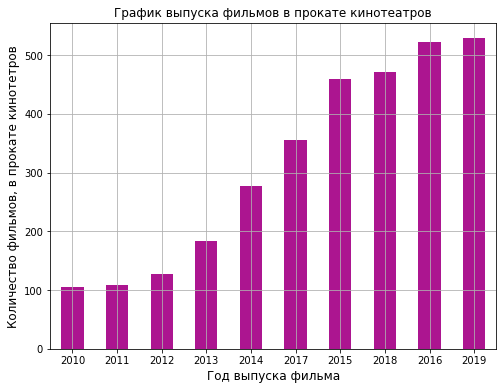

2010    105
2011    109
2012    128
2013    184
2014    278
2017    355
2015    459
2018    471
2016    523
2019    529
Name: year, dtype: int64

In [62]:
(
data[data['box_office'].notna()]['year']
    .value_counts(ascending=True)
    .plot(grid=True, kind='bar', figsize=(8, 6), color='#AC1590')
)
plt.xticks(rotation=0)
plt.title('График выпуска фильмов в прокате кинотеатров', size=12)
plt.xlabel('Год выпуска фильма', size=12)
plt.ylabel('Количество фильмов, в прокате кинотетров', size=12)
plt.show()

data[data['box_office'].notna()]['year'].value_counts(ascending=True)

Наблюдается стабильная динамика рсота количества фильмов в прокате кинотеатров начиная с 2011 года

Доля фильмов с указаной информацией о прокате в кинотеатрах.

In [63]:
data['box_office'].notna().mean().round(3)

0.421

Доля фильмов с указаной информацией о прокате в кинотеатрах с группировкой по годам.

In [64]:
data.pivot_table(index='year', values='box_office', aggfunc=lambda x: x.notna().mean())

,box_office
year,
2010,0.11
2011,0.18
2012,0.22
2013,0.29
2014,0.35
2015,0.66
2016,0.64
2017,0.71
2018,0.53


Полнее всего у нас имеется информация о прокате в кинотеатрах с 2015 по 2017 года (65%-71%), из них самый полный в 2017 году. Наименее представлен период 2010 года, чуть более 11%.

#### Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной и максимальной

In [65]:
data.pivot_table(index='year', values='box_office', aggfunc='sum')

,box_office
year,
2010,2428654.00
2011,14102765.00
2012,6955423.00
2013,29799706.20
2014,7434717843.10
2015,38527827199.09
2016,46742316269.48
2017,48458147253.75
2018,49251991405.20


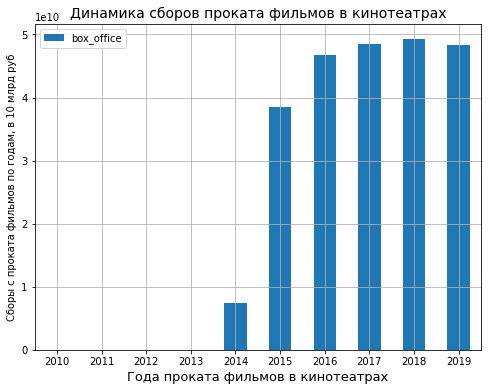

In [66]:
data.pivot_table(index='year', values='box_office', aggfunc='sum').plot(grid=True, kind='bar', figsize=(8, 6))
plt.xticks(rotation=0)
plt.title('Динамика сборов проката фильмов в кинотеатрах', size=14)
plt.xlabel('Года проката фильмов в кинотеатрах', size=13)
plt.ylabel('Сборы с проката фильмов по годам, в 10 млрд руб')
plt.show()

Самая минимальная сумма сборов судя по графику и таблице это 2010 год, самая максимальная сумма сборов это - 2017 год. 
Динамика сборов увеличивается стабильно вплоть до 2016 года, затем рост прекращается, остается относительно неизменным. Также, судя по предыдущему пункту, у на самая полная информация о прокатах - 2015-2017 года, а самые неполные 2010-2013, поэтому самая акутальная информация по динамике у нас это начиная с 2015 года.

#### С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [67]:
data.pivot_table(index='year', values='box_office', aggfunc=('mean', 'median'))

,mean,median
year,,
2010,23130.04,1700.00
2011,129383.17,3000.00
2012,54339.24,5660.00
2013,161954.92,3522.50
2014,26743589.36,18137.50
2015,83938621.35,4784781.50
2016,89373453.67,3776087.56
2017,136501823.25,9919415.00
2018,104568983.88,8751895.75


Средняя и медианная сумма сбора существенно отличаются - средняя сумма сборов оказывается в разы выше медианной. Это значит, что среди фильмов есть явные фавориты, приносящие своим создателям существенную долю от общего проката. А сборы большей части фильмов весьма скромные.

#### Определим:
* влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. 
* фильмы с каким возрастным ограничением собрали больше всего денег в прокате?
* меняется ли картина в зависимости от года?

Посмотрим на уникальные значения групп возрастного ограничения аудитории

In [68]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Сократим наши длинные названия категорий возрастных ограничений аудитории до значений возраста.

In [69]:
data['age_restriction'] = data['age_restriction'].str.split(' - ').str[0]

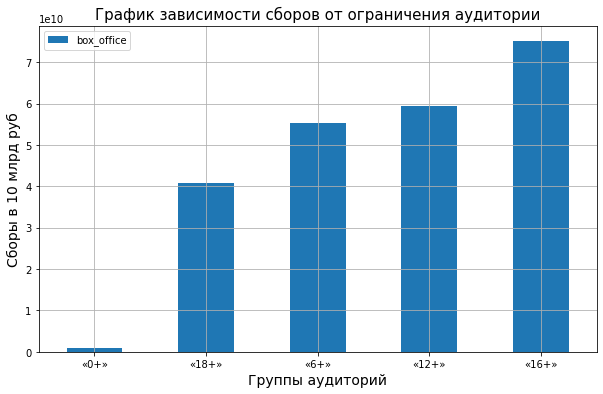

                    box_office
age_restriction               
«0+»              809077425.97
«18+»           40757657833.61
«6+»            55220193077.92
«12+»           59369189769.50
«16+»           75102265973.60


In [70]:
(
data[data['year'] > 2014].pivot_table(index=['age_restriction'], values='box_office', aggfunc='sum')
    .sort_values('box_office')
    .plot(grid=True, kind='bar', figsize=(10, 6))
)
plt.xticks(rotation=0)
plt.title('График зависимости сборов от ограничения аудитории', size=15)
plt.xlabel('Группы аудиторий', size=14)
plt.ylabel('Сборы в 10 млрд руб', size=14)
plt.show()
print(data[data['year'] > 2014].pivot_table(index=['age_restriction'], values='box_office', aggfunc='sum')
    .sort_values('box_office'))

Как мы видим имеется незначительная зависимость сборов от ограничения аудитории. Максимальный сбор с проката фильмов с ограничением аудитории **"16+"**, минимальный сбор **"0+"**

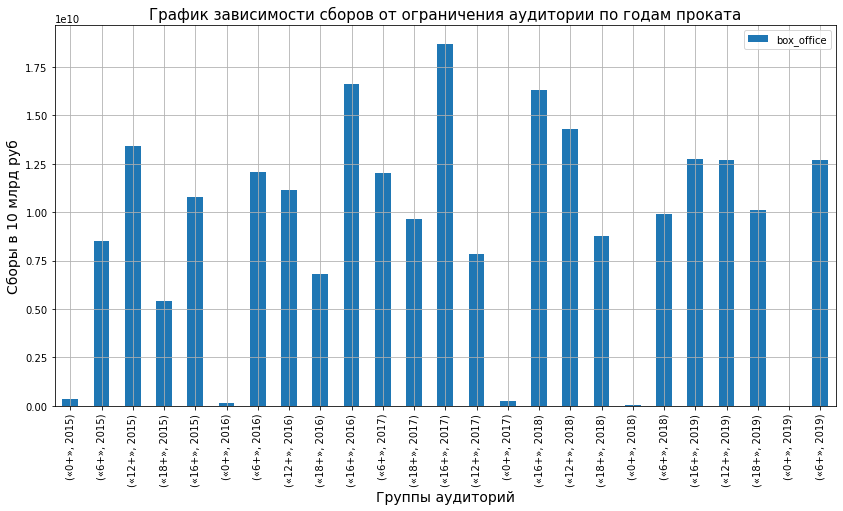

                         box_office
age_restriction year               
«0+»            2015   379054578.37
«6+»            2015  8517311820.01
«12+»           2015 13419509570.51
«18+»           2015  5430350628.93
«16+»           2015 10781600601.27
«0+»            2016   150228848.67
«6+»            2016 12053146008.24
«12+»           2016 11150762103.96
«18+»           2016  6793929818.87
«16+»           2016 16594249489.74
«6+»            2017 12031034131.00
«18+»           2017  9651495581.02
«16+»           2017 18694590951.06
«12+»           2017  7851427660.67
«0+»            2017   229598930.00
«16+»           2018 16278405946.93
«12+»           2018 14267291660.69
«18+»           2018  8760085501.15
«0+»            2018    32449002.11
«6+»            2018  9913759294.32
«16+»           2019 12753418984.60
«12+»           2019 12680198773.67
«18+»           2019 10121796303.64
«0+»            2019    17746066.82
«6+»            2019 12704941824.35


In [71]:
(
data[data['year'] > 2014].pivot_table(index=['age_restriction', 'year'], values='box_office', aggfunc='sum')
    .sort_values('year')
    .plot(grid=True, kind='bar', figsize=(14, 7))
)
plt.xticks(rotation=90)
plt.title('График зависимости сборов от ограничения аудитории по годам проката', size=15)
plt.xlabel('Группы аудиторий', size=14)
plt.ylabel('Сборы в 10 млрд руб', size=14)
plt.show()
print(data[data['year'] > 2014].pivot_table(index=['age_restriction', 'year'], values='box_office', aggfunc='sum')
    .sort_values('year'))

После дполнительной группировки по годам с 2015 по 2019, картина в целом не меняется. С той лишь разницей, что в 2015 году у нас самые большие сборы с проката фильмов для аудитории **"12+"**, начиная с 2016 года уверенное превенство сохраняет вплоть до 2019 года аудитрия **"16+"**, лишь немного уступив в 2019 году аудитории **"0+"**. Однако в 2019 году аудитория **"0+"** выходит на первое место. Возможно это связано с выходом ожидаемых качественных фильмов для целевой аудитории.

**Промежуточный вывод 3**

На данном этапе мы провели исследовательский анализ данных:
* посмотрели, сколько фильмов выходило в прокат каждый год;
    * наблюдается стабильная динамика роста количества фильмов в прокате кинотеатров начиная с 2011 года
* посчитали, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах;
    * 44,5% - доля фильмов с указанной информацией о прокате
* проанализировали, как эта доля менялась по годам;
    * Полнее всего у нас имеется информация о прокате в кинотеатрах с 2015 по 2017 года (65%-71%), из них самый полный в 2017 году. Наименее представлен период 2010 года, чуть более 11%
* изучили, как менялась динамика проката по годам;
    * Самая минимальная сумма сборов судя по графику и таблице это 2010 год, самая максимальная сумма сборов это - 2017 год. 
    * Динамика сборов увеличивается стабильно вплоть до 2016 года, затем рост прекращается, остается относительно неизменным. Также, судя по предыдущему пункту, у на самая полная информация о прокатах - 2015-2017 года, а самые неполные 2010-2013, поэтому самая акутальная информация по динамике у нас это начиная с 2015 года
* у нас огромная разница по сумме 'сборов' между 'средней' и 'медианой', это можно объяснить наличием выбросов в данных, т.е. среди фильмов есть явные звезды, приносящие своим создателям существенную долю от общего проката. А сборы большей части фильмов весьма скромные;
* изучили, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год
    * имеется незначительная зависимость сборов от ограничения аудитории. Максимальный сбор с проката фильмов с ограничением аудитории **"16+"**, минимальный сбор **"0+"**
    * После дполнительной группировки по годам с 2015 по 2019, картина в целом не меняется. С той лишь разницей, что в 2015 году у нас самые большие сборы с проката фильмов для аудитории **"12+"**, начиная с 2016 года уверенное превенство сохраняет вплоть до 2019 года аудитрия **"16+"**, лишь немного уступив в 2019 году аудитории **"0+"**. Однако в 2019 году аудитория **"0+"** выходит на первое место. Возможно это связано с выходом ожидаемых качественных фильмов для целевой аудитории

### Исследуем фильмы, которые получили государственную поддержку

#### Посмотрим, сколько в наших данных фильмов с государственной поддержкой, согласно описанию к данным.

In [72]:
data[data['budget'] != 0]['budget'].count()

315

#### Создадим датафрейм в который воет информация по фильмам:
* периоду с 2015 по 2019 года, так как информация наиболее представлена в этом периоде;
* фильмы с государственной поддержкой

In [73]:
data_support = data[(data['year'] > 2014) & (data['budget'] > 0)].copy()
data_support.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres,share_of_support
1853,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+»,0,25000000,51850000,Министерство культуры,6.10,"мультфильм,фэнтези,история",15078858.60,2015,С.Серегин,мультфильм,0.48
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,unknown,«12+»,50000000,100000000,220588394,Фонд кино,8.50,"драма,военный,история",249166767.70,2015,Р.Давлетьяров,драма,0.68
1902,Призрак_.,111001815,2015-03-02 12:00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+»,0,75000000,139551503,Фонд кино,7.00,"триллер,боевик,приключения",352804320.40,2015,А.Войтинский,триллер,0.54
1911,Ведьма .,111002215,2015-03-05 12:00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+»,0,34000000,48571430,Министерство культуры,7.40,"фэнтези,приключения,драма",51907.50,2015,Д.Федоров,фэнтези,0.70
2083,Дорога на Берлин,111001315,2015-02-17 12:00:00,Художественный,"ООО ""Продюсерская компания Александра Литвинов...",Россия,С.Попов,"А.Литвинов, К.Шахназаров",«12+»,0,45000000,89782312,Министерство культуры,6.20,"военный,драма,история",22723575.00,2015,С.Попов,военный,0.50


#### Создадим столбец, который будет содержать полную сумму государственной поддержки.

In [74]:
data_support['government_support'] = 0
data_support['government_support'] = data_support['refundable_support'] + data_support['nonrefundable_support']
data_support.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres,share_of_support,government_support
1853,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+»,0,...,51850000,Министерство культуры,6.10,"мультфильм,фэнтези,история",15078858.60,2015,С.Серегин,мультфильм,0.48,25000000
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,unknown,«12+»,50000000,...,220588394,Фонд кино,8.50,"драма,военный,история",249166767.70,2015,Р.Давлетьяров,драма,0.68,150000000
1902,Призрак_.,111001815,2015-03-02 12:00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+»,0,...,139551503,Фонд кино,7.00,"триллер,боевик,приключения",352804320.40,2015,А.Войтинский,триллер,0.54,75000000
1911,Ведьма .,111002215,2015-03-05 12:00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+»,0,...,48571430,Министерство культуры,7.40,"фэнтези,приключения,драма",51907.50,2015,Д.Федоров,фэнтези,0.70,34000000
2083,Дорога на Берлин,111001315,2015-02-17 12:00:00,Художественный,"ООО ""Продюсерская компания Александра Литвинов...",Россия,С.Попов,"А.Литвинов, К.Шахназаров",«12+»,0,...,89782312,Министерство культуры,6.20,"военный,драма,история",22723575.00,2015,С.Попов,военный,0.50,45000000


Посмотрим на распределение выделяемых средств, начиная с 2015 года, так как эти периоды с наименьшим количеством пропусков в наших данных. В сводной таблице также посмотрим на количество фильмов с государственной поддержкой по годам.

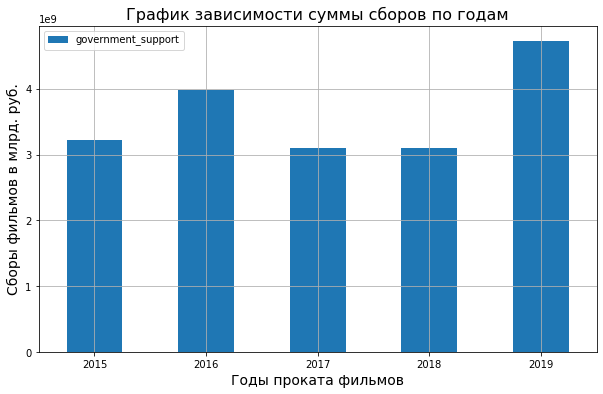

,count,sum
,government_support,government_support
year,,
2015,80,3227241459
2016,58,3977155482
2017,39,3098971662
2018,52,3098000000
2019,69,4724000000


In [75]:
(
data_support.pivot_table(index='year', values='government_support', aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(10, 6))
)
plt.xticks(rotation=0)
plt.title('График зависимости суммы сборов по годам', size=(16))
plt.xlabel('Годы проката фильмов', size=14)
plt.ylabel('Сборы фильмов в млрд. руб.', size=14)
plt.show()

(
data_support
    .pivot_table(index='year', values='government_support', aggfunc=['count', 'sum'])
)

Посмотрим на окупаемость фильмов, на которые выделяются средства государственной поддержки, за счет соотношения собранных средств к выделенным.

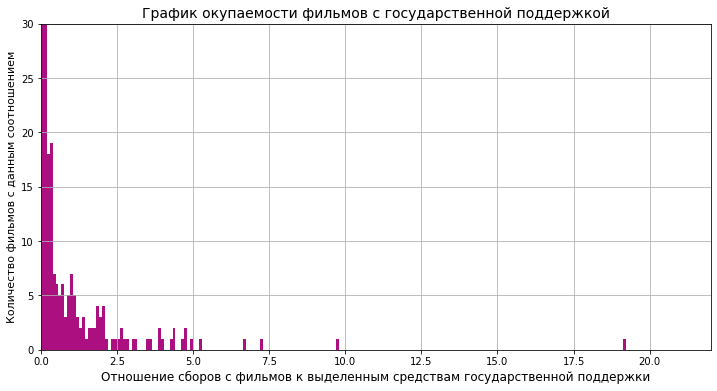

In [76]:
(
data_support['box_office'] / 
    data_support['budget']
).plot(grid=True, kind='hist', bins=200, xlim=(0, 22), ylim=(0, 30), figsize=(12, 6), color='#AC1080')
plt.title('График окупаемости фильмов с государственной поддержкой', size=14)
plt.xlabel('Отношение сборов с фильмов к выделенным средствам государственной поддержки', size=12)
plt.ylabel('Количество фильмов с данным соотношением', size=11)
plt.show()

In [77]:
(
data_support['box_office'] / 
    data_support['budget']
).describe()

count     298
mean     <NA>
std      <NA>
min       NaN
25%      0.02
50%      0.16
75%      0.79
max       NaN
dtype: object

In [78]:
(
data_support['box_office'] / 
    data_support['budget'] < 1
).sum()

221

In [79]:
(
data_support['box_office'] / 
    data_support['budget'] >= 1
).sum()

63

Как мы видим средняя сильно отличается от медианны, что говорит о наличии выбросов. Судя по медиане большая часть фильмов с государственной поддержкой не окупаются, соотношение меньше единицы. Почти 75% фильмов с государственной поддержкой не окупаются, это видно по соотношению собранных средств к выделенным меньше единицы.

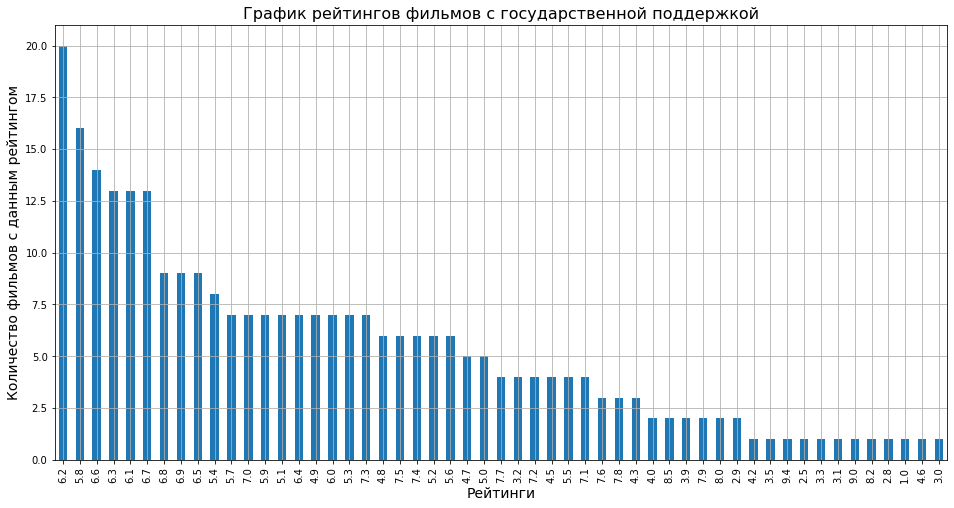

6.20    20
5.80    16
6.60    14
6.30    13
6.10    13
6.70    13
6.80     9
6.90     9
6.50     9
5.40     8
5.70     7
7.00     7
5.90     7
5.10     7
6.40     7
4.90     7
6.00     7
5.30     7
7.30     7
4.80     6
7.50     6
7.40     6
5.20     6
5.60     6
4.70     5
5.00     5
7.70     4
3.20     4
7.20     4
4.50     4
5.50     4
7.10     4
7.60     3
7.80     3
4.30     3
4.00     2
8.50     2
3.90     2
7.90     2
8.00     2
2.90     2
4.20     1
3.50     1
9.40     1
2.50     1
3.30     1
3.10     1
9.00     1
8.20     1
2.80     1
1.00     1
4.60     1
3.00     1
Name: ratings, dtype: int64

In [80]:
(
data_support['ratings']
    .value_counts().plot(grid=True, kind='bar', figsize=(16, 8))
)
plt.title('График рейтингов фильмов с государственной поддержкой', size=16)
plt.xlabel('Рейтинги', size=14)
plt.ylabel('Количество фильмов с данным рейтингом', size=14)
plt.show()

data_support['ratings'].value_counts()

Как видно, основная часть рейтингов фильмов с государственной поддержкой находится в диапозоне от 5,8 до 6,7. Средний показатель, рейтинги превышающие значение 8, что могло бы говорить о высокой оценки фильмов - единичные случаи.

Посмотрим на динамику выпускаемых фильмов с государственной поддержкой с 2015 по 2019 год

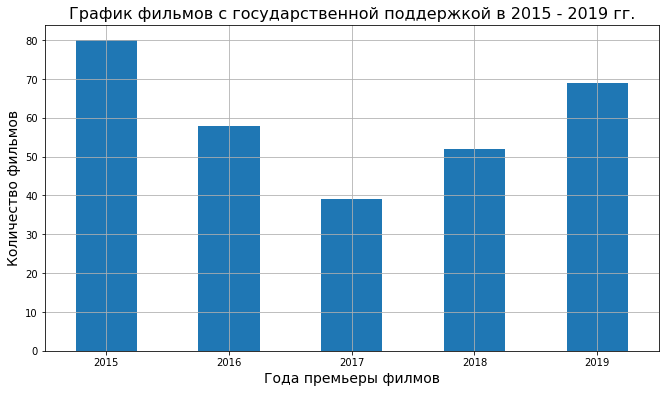

In [81]:
(
data_support['year']
    .value_counts().sort_index()
    .plot(grid=True, kind='bar', figsize=(11, 6))
)
plt.xticks(rotation=0)
plt.title('График фильмов с государственной поддержкой в 2015 - 2019 гг.', size=16)
plt.xlabel('Года премьеры филмов', size=14)
plt.ylabel('Количество фильмов', size=14)
plt.show()

Динамика отрицаетльная до 2017 года, начиная с 2017 по 2019 количество фильмов с государственной поддержкой стабильно растет. На разных этапах периолов это может быть связано:
* с сокращением бюджета финансирования;
* свое влияние могли оказать санкции;
* спрос зрительского интереса

**Промежуточный вывод 4**

Исследовали фильмы, которые получили государственную поддержку в период с 2015 по 2019гг., построили графики:
* количество фильмов с государственной поддержкой по нашим данным - 332
* создали датасет с отфильтрованными фильмами с господдержкой и с периодом с 2015 по 2019 гг;
* создали дполнительный столбец, который содержит информацию только о выделенных средствах государственной поддержки
    * построили график распределения выделяемых средств, начиная с 2015 года. В сводной таблице также посчитали количество фильмов с государственной поддержкой по годам
    * судя по графику сумма выделяемых средств не сильно отличается по годам
* изучили окупаемость фильмов, на которые выделяются средства государственной поддержки, за счет соотношения собранных средств к выделенным, построили график
    * почти 75% фильмов с государственной поддержкой не окупаются, это видно по соотношению собранных средств к выделенным меньше единицы
* изучили распределение рейтингов фильмов с государственной поддержкой:
    * основная часть рейтингов фильмов с государственной поддержкой находится в диапозоне от 5,5 до 6,7, это средний показатель. Рейтинги превышающие значение 8, что могло бы говорить о высокой оценки фильмов - единичные случаи
* изучили динамику выпускаемых фильмов с государственной поддержкой с 2015 по 2019 год
    * Динамика отрицаетльная до 2017 года, начиная с 2017 по 2019 количество фильмов с государственной поддержкой стабильно растет. На разных этапах периолов это может быть связано:
        * с сокращением бюджета финансирования;
        * свое влияние могли оказать санкции;
        * спрос зрительского интереса

### Общий вывод

В данной работе мы произвели исследование данных о российском кинопрокате.
В процессе исследования нами были выполнены следующие действия.

1) Мы считали файлы с данными о российском кинопрокате с 2х источников.
* В 1м источнике данных имеются 7486 записи.
* Во 2м источнике 3158 записи, это 2 столбца:
    * номер прокатного удостоверения (который имеется также в первом источнике)
    * сборы от проката фильма в кинотеатрах в рублях.
* Мы объеденили таблицы с разных источников по общим данным - номер прокатного удостоверения
* Дополнительно мы переименовали столбец 'puNumber' на 'pu_number' согласно принятому стилю
* В данных имеются такие проблемы как:
    * пропуски в нескольких колонках
    * формат типа данных не везде соответствует типу данных
Необходимо сделать предобработку данных, для возможности их дальнейшего анализа.

2) На данном этапе мы завершили предобработку данных, а именно:
* изменили тип данных в столбцах:
    * 'show_start_date' с 'object' на 'datetime'
    * 'ratings' с 'object' на 'float'
    * 'refundable_support', 'nonrefundable_support', 'budget' с 'float' на 'int'
* Предварительно проверили уникальные значения в столбце 'ratings', привели их к одному типу
* обработали и заполнили пропуски данных в столбцах:
    * 'film_studio', 'director', 'genres' значением 'unknown';
    * 'ratings' медианным значением после группировки по 'genres';
    * 'production_country' для 'Ералаш' мы заполнили страну как Россия;
    * 'producer', и оставшийся пропуск в столбце 'production_country' аналогично нам заполнить нечем, также заполнили 'unknown'
    * 'refundable_support', 'nonrefundable_support', 'budget' и 'financing_source'
        Судя по описанию "...столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. ".
        Соответственно, данные во всех четырех столбцах связаны, что также потверждает общее количество пропущенных значений. Отсюда следует, что раз пропущено значение в столбце 'budget', значит государственная поддержка для данного фильма равна '0', как и в остальных столбцах, кроме 'financing_source'.
    * в столбце 'financing_source' мы пропуски заполним словом 'нет'.
* проверили на содержание явных и невяных дубликатов данные:
    * имеющиеся совпадения в названиях фильмов не случайны, не смотря на то что у них разные номера прокатного удостоверения, это зачастую дубликаты, судя по совпаданиям в других столбцах, таких как: год выпуска, тип фильма, киностудия производитель, страна производитель, режиссер, продюсер, рейтинг. Однако, удалить данные дубликаты мы не можем, так как у них разные прокатные удостоверения, и они могут выпускаться различными организациями на различных площадках, что означет наличие у них различных финансовых показателях.
* По категориальным столбцам у нас присутсвуют следующие проблемы:
    * общая проблема почти для всех категориальных столбцов - очень длинные названия, они содержат очень много уникальных значений из-за того, что в них идет перечисления отдельных признаков;
    * наличие пробелов с троках
    * различные способы записи групп стран (например 'США, Германия' и 'США-Германия', либо 'США - Франция' и 'США-Франция') при прочих равных столбцах различный порядок написания стран: 'США-Германия' и 'Германия-США' Основную часть этих проблем мы исправили на предыдущем этапе
* проверили количественные данные:
    * судя по описанию данных "столбец 'budget' уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку." Отсюда следует, что должно выполнятся равенство 'budget' == 'refundable_support' + 'nonrefundable_support'. Проверка показала что в 95% по данным в данном вопросе все сходится, по остальным 5% имелись несоответствия:
    * так как пропуски в столбце **'budget'** были заполнены **'0'**, при этом в некотрых данных имеются значения отличных от нуля в столбцах **'refundable_support', 'nonrefundable_support'** в этих же строках, заменили нулевое значение в столбце **'budget'** на сумму значений столбцов **'refundable_support', 'nonrefundable_support'**
    * по тем данным где бюджет превосходил сумму вовзвратных выделенных средств мы допустили возможность присутствия в бюджете дополнительно спонсорских средств не отсносящиеся к государственной подерржке, оставили эти данные без изменений
    * проведена проверка на наличие аномалий в числовых столбцах
        * В наших данных в столбце **'pu_number'** имеется аномальное значение номера прокатного удостоверения, которое выбивается из всей массы по количеству знаков, скорее всего это связано с ошибкой при заполнении, и добавления точки перед двумя нулями       
        * Также у нас имеется нулевое значение сборов с опредленных фильмов. Это необычно, но вполне допустимо:
            * при провальных прокатов фильма
            * государственные/ведомственные заказы без коммерческого распространения
            * бесплатные показы (благотворительные, учебные)
* добавили новые столбцы с параметрами:
    * с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно
    * доля государственной поддержки соотношением соответствующих столбцов (суммы вовзвратных и невозвратных средств к общему бюджету)
    
3) На данном этапе мы провели исследовательский анализ данных:
* посмотрели, сколько фильмов выходило в прокат каждый год;
    * наблюдается стабильная динамика роста количества фильмов в прокате кинотеатров начиная с 2011 года
* посчитали, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах;
    * 44,5% - доля фильмов с указанной информацией о прокате
* проанализировали, как эта доля менялась по годам;
    * Полнее всего у нас имеется информация о прокате в кинотеатрах с 2015 по 2017 года (65%-71%), из них самый полный в 2017 году. Наименее представлен период 2010 года, чуть более 11%
* изучили, как менялась динамика проката по годам;
    * Самая минимальная сумма сборов судя по графику и таблице это 2010 год, самая максимальная сумма сборов это - 2017 год. 
    * Динамика сборов увеличивается стабильно вплоть до 2016 года, затем рост прекращается, остается относительно неизменным. Также, судя по предыдущему пункту, у на самая полная информация о прокатах - 2015-2017 года, а самые неполные 2010-2013, поэтому самая акутальная информация по динамике у нас это начиная с 2015 года
* у нас огромная разница по сумме 'сборов' между 'средней' и 'медианой', это можно объяснить наличием выбросов в данных, т.е. среди фильмов есть явные звезды, приносящие своим создателям существенную долю от общего проката. А сборы большей части фильмов весьма скромные;
* изучили, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год
    * имеется незначительная зависимость сборов от ограничения аудитории. Максимальный сбор с проката фильмов с ограничением аудитории **"16+"**, минимальный сбор **"0+"**
    * После дполнительной группировки по годам с 2015 по 2019, картина в целом не меняется. С той лишь разницей, что в 2015 году у нас самые большие сборы с проката фильмов для аудитории **"12+"**, начиная с 2016 года уверенное превенство сохраняет вплоть до 2019 года аудитрия **"16+"**, лишь немного уступив в 2019 году аудитории **"0+"**. Однако в 2019 году аудитория **"0+"** выходит на первое место. Возможно это связано с выходом ожидаемых качественных фильмов для целевой аудитории 
    
4) Исследовали фильмы, которые получили государственную поддержку в период с 2015 по 2019гг., построили графики:
* количество фильмов с государственной поддержкой по нашим данным - 332
* создали датасет с отфильтрованными фильмами с господдержкой и с периодом с 2015 по 2019 гг;
* создали дполнительный столбец, который содержит информацию только о выделенных средствах государственной поддержки
    * построили график распределения выделяемых средств, начиная с 2015 года. В сводной таблице также посчитали количество фильмов с государственной поддержкой по годам
    * судя по графику сумма выделяемых средств не сильно отличается по годам
* изучили окупаемость фильмов, на которые выделяются средства государственной поддержки, за счет соотношения собранных средств к выделенным, построили график
    * почти 75% фильмов с государственной поддержкой не окупаются, это видно по соотношению собранных средств к выделенным меньше единицы
* изучили распределение рейтингов фильмов с государственной поддержкой:
    * основная часть рейтингов фильмов с государственной поддержкой находится в диапозоне от 5,5 до 6,7, это средний показатель. Рейтинги превышающие значение 8, что могло бы говорить о высокой оценки фильмов - единичные случаи
* изучили динамику выпускаемых фильмов с государственной поддержкой с 2015 по 2019 год
    * Динамика отрицаетльная до 2017 года, начиная с 2017 по 2019 количество фильмов с государственной поддержкой стабильно растет. На разных этапах периолов это может быть связано:
        * с сокращением бюджета финансирования;
        * свое влияние могли оказать санкции;
        * спрос зрительского интереса